In [1]:
import numpy as np

from function_modules.function_module import *
from function_modules import parallel_function_module

In [2]:
# Shared directory to save results 
shared_data_dir = 'Data/parameter_testing/parallel_GA/'

# Shared GA parameters
kwargs = {
    'cnn_model_path': '../../Models/CNN_6_1_2.keras',
    'masked_sequence': 'AATACTAGAGGTCTTCCGACNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNGTGTGGGCGGGAAGACAACTAGGGG',
    'seed': 0,
}

# Testing parameters
target_expressions = [0, 0.5, 1]
lineages = 10
test_cases = 11

In [3]:
# Compare GeneticAlgorithm with and without ThreadPoolExecutor

# Evaluate ParallelGeneticAlgorithm without migration
param_ranges = {
    'migration_interval': [None],
    'migration_rate': [0],
}
ParallelGeneticAlgorithm_df = parallel_function_module.test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}parallelization.csv')


# Evaluate GeneticAlgorithm
param_ranges = {}
GeneticAlgorithm_df = test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}GeneticAlgorithm.csv')

Processing combinations:   0%|          | 0/3 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Instructions for updating:
Use tf.identity with explicit device placement instead.


Processing combinations:   0%|          | 0/30 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 30/30 [01:46<00:00,  3.54s/it, Elapsed=1.77min, ETA=0.00s] 


In [21]:
# Read results (if necessary) and print

ParallelGeneticAlgorithm_df = pd.read_csv(f'{shared_data_dir}parallelization.csv')
average_PGA = ParallelGeneticAlgorithm_df['run_time'].mean()/lineages
print('Averaged run time for ParallelGeneticAlgorithm')
print(f'{average_PGA:0.2f}')
print()

GeneticAlgorithm_df = pd.read_csv(f'{shared_data_dir}GeneticAlgorithm.csv')
average_GA = GeneticAlgorithm_df['run_time'].mean()
print('Averaged run time for GeneticAlgorithm')
print(f'{average_GA:0.2f}')
print()

Averaged run time for ParallelGeneticAlgorithm
3.41

Averaged run time for GeneticAlgorithm
3.33



In [3]:
param_ranges = {
    'migration_interval': np.linspace(0, 10, test_cases, dtype=int),
    'migration_rate': np.linspace(0, 1, test_cases),
}

results_df = parallel_function_module.test_params(param_ranges, target_expressions, lineages, kwargs, to_csv=f'{shared_data_dir}migration.csv')

Processing combinations:   0%|          | 0/363 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Instructions for updating:
Use tf.identity with explicit device placement instead.


Processing combinations: 100%|██████████| 363/363 [3:45:17<00:00, 37.24s/it, Elapsed=3.75h, ETA=0.00s]     


Optimal migration_interval for error: 0.800
Optimal migration_rate for error: 8.000
  - Average error: 0.105

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal migration_interval for run_time: 1.000
Optimal migration_rate for run_time: 7.000
  - Average run_time: 28.376

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



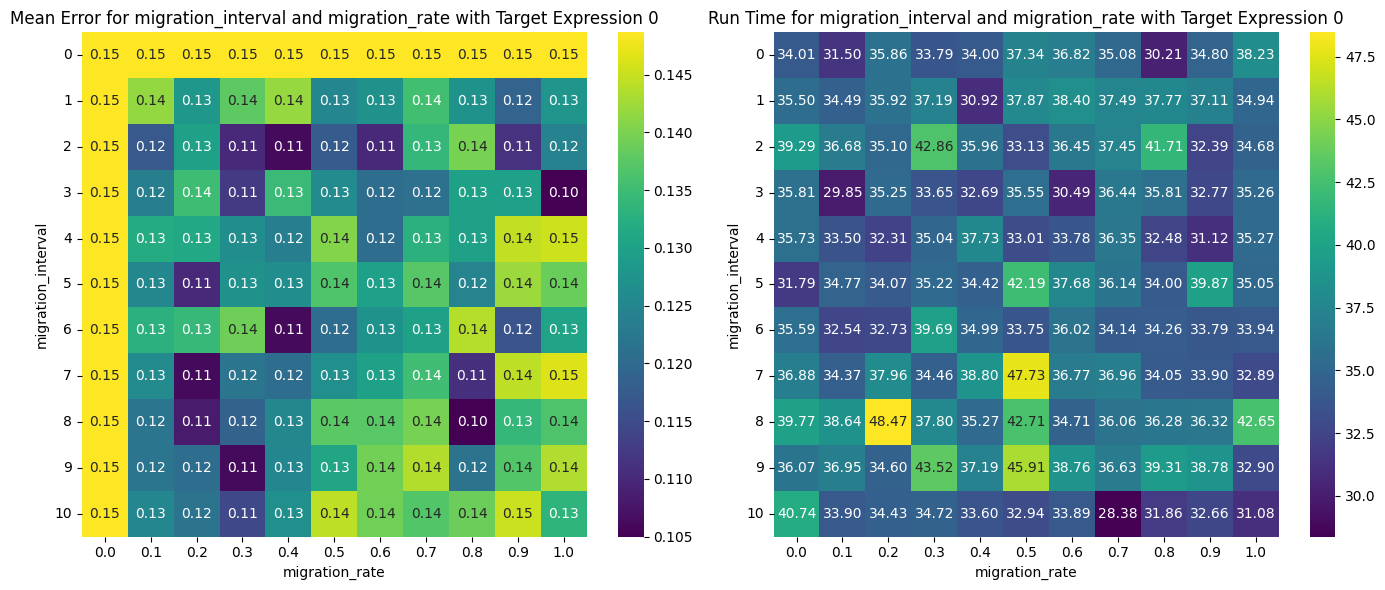

Optimal migration_interval for error: 0.900
Optimal migration_rate for error: 8.000
  - Average error: 0.000

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal migration_interval for run_time: 1.000
Optimal migration_rate for run_time: 7.000
  - Average run_time: 32.874

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



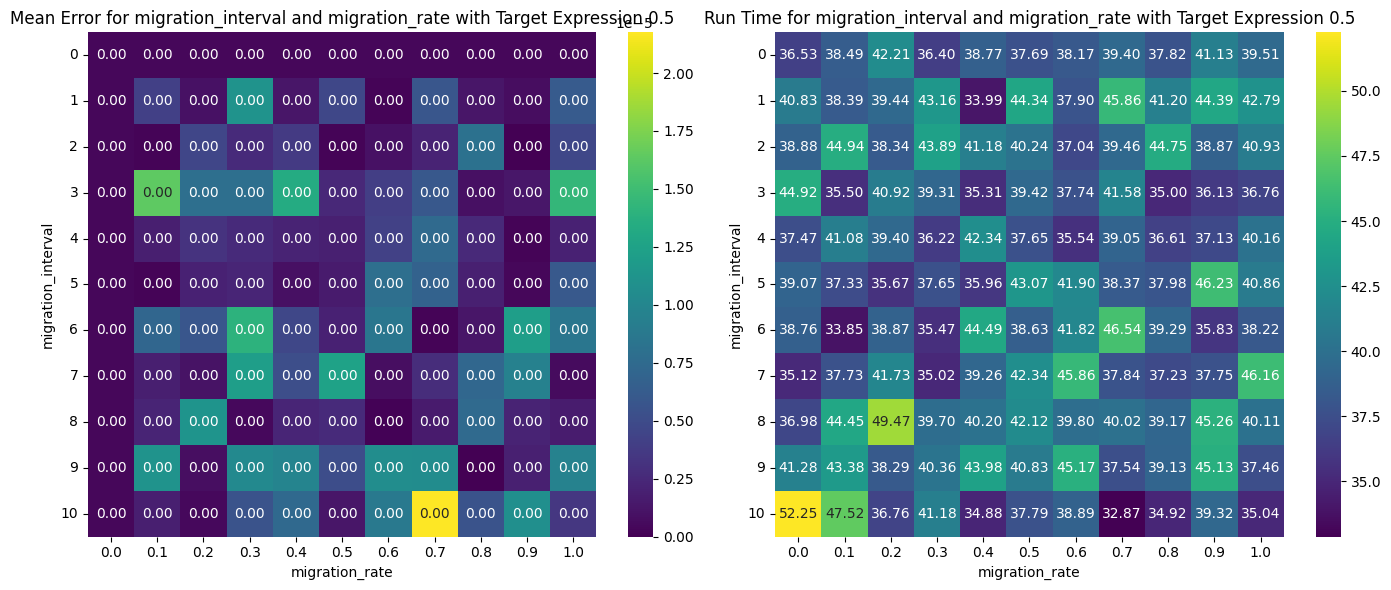

Optimal migration_interval for error: 0.800
Optimal migration_rate for error: 4.000
  - Average error: 0.076

Statistical Test for error:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant

Optimal migration_interval for run_time: 0.100
Optimal migration_rate for run_time: 3.000
  - Average run_time: 30.368

Statistical Test for run_time:
  - Statistic: 120.000
  - p-value: 4.828e-01
  - Not Significant



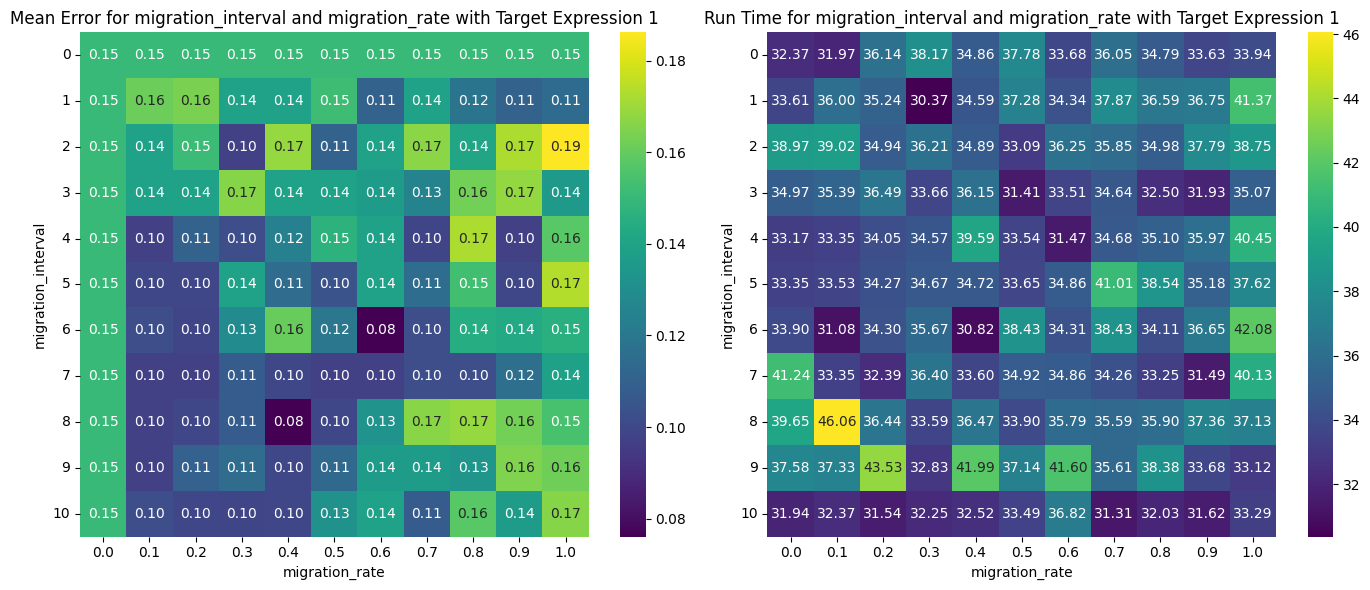

In [4]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}migration.csv')

for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    heatmap(filtered_df, target_expression, 'migration_interval', 'migration_rate')

In [7]:
# Evaluate ParallelGeneticAlgorithm with migration
param_ranges = {
    'migration_interval': [7],
    'migration_rate': [0.15],
}
ParallelGeneticAlgorithm_migration_df = parallel_function_module.test_params(param_ranges, target_expressions, lineages, kwargs)
ParallelGeneticAlgorithm_migration_df['algorithm'] = 'ParallelGeneticAlgorithm_migration'

# Evaluate GeneticAlgorithm
param_ranges = {}
GeneticAlgorithm_df = test_params(param_ranges, target_expressions, lineages, kwargs)
GeneticAlgorithm_df['algorithm'] = 'GeneticAlgorithm'

# Concatenate all results, and save to csv
results_df = pd.concat([ParallelGeneticAlgorithm_migration_df, GeneticAlgorithm_df])
results_df.to_csv(f'{shared_data_dir}parallel_comparison.csv', index=False)

Processing combinations:   0%|          | 0/3 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations:   0%|          | 0/30 [00:00<?, ?it/s]c:\Users\rsore\anaconda3\envs\TX_prediction\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
Processing combinations: 100%|██████████| 30/30 [01:49<00:00,  3.65s/it, Elapsed=1.82min, ETA=0.00s] 


c:\Users\rsore\Documents\GitHub\promoter-sequence-transcription-rates\v2\Testing GA\GA_deap\function_modules\function_module.py:198: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=results_df, x='error', hue=index, fill=False, ax=axes[0])
c:\Users\rsore\Documents\GitHub\promoter-sequence-transcription-rates\v2\Testing GA\GA_deap\function_modules\function_module.py:204: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=results_df, x='run_time', hue=index, fill=False, ax=axes[1])


Optimal algorithm for error: ParallelGeneticAlgorithm_migration (Average error: 0.126)
ANOVA Test for error by algorithm:
  - F-statistic: 0.566
  - p-value: 4.709e-01
  - Not Significant

Optimal algorithm for run_time: GeneticAlgorithm (Average run_time: 3.290)
ANOVA Test for run_time by algorithm:
  - F-statistic: 19610.876
  - p-value: 2.454e-16
  - Significant



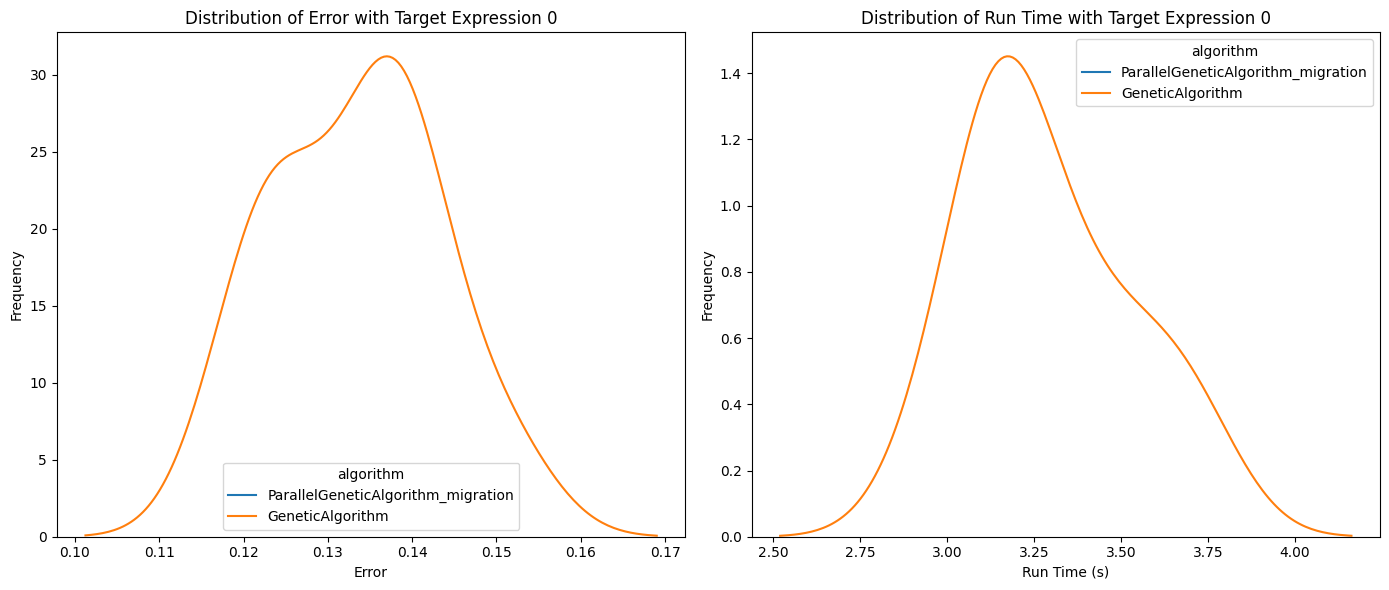

c:\Users\rsore\Documents\GitHub\promoter-sequence-transcription-rates\v2\Testing GA\GA_deap\function_modules\function_module.py:198: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=results_df, x='error', hue=index, fill=False, ax=axes[0])
c:\Users\rsore\Documents\GitHub\promoter-sequence-transcription-rates\v2\Testing GA\GA_deap\function_modules\function_module.py:204: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=results_df, x='run_time', hue=index, fill=False, ax=axes[1])


Optimal algorithm for error: ParallelGeneticAlgorithm_migration (Average error: 0.000)
ANOVA Test for error by algorithm:
  - F-statistic: 2.202
  - p-value: 1.720e-01
  - Not Significant

Optimal algorithm for run_time: GeneticAlgorithm (Average run_time: 3.583)
ANOVA Test for run_time by algorithm:
  - F-statistic: 39625.704
  - p-value: 1.037e-17
  - Significant



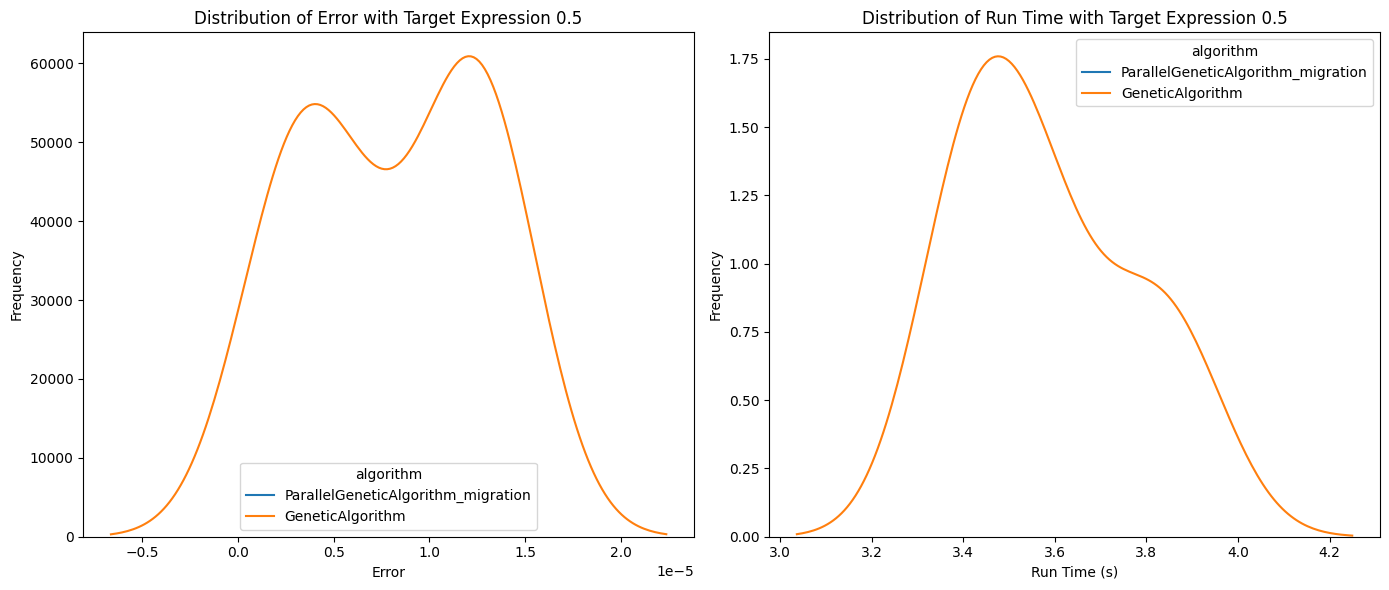

c:\Users\rsore\Documents\GitHub\promoter-sequence-transcription-rates\v2\Testing GA\GA_deap\function_modules\function_module.py:198: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=results_df, x='error', hue=index, fill=False, ax=axes[0])
c:\Users\rsore\Documents\GitHub\promoter-sequence-transcription-rates\v2\Testing GA\GA_deap\function_modules\function_module.py:204: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=results_df, x='run_time', hue=index, fill=False, ax=axes[1])


Optimal algorithm for error: ParallelGeneticAlgorithm_migration (Average error: 0.140)
ANOVA Test for error by algorithm:
  - F-statistic: 1.853
  - p-value: 2.066e-01
  - Not Significant

Optimal algorithm for run_time: GeneticAlgorithm (Average run_time: 3.435)
ANOVA Test for run_time by algorithm:
  - F-statistic: 28376.929
  - p-value: 4.655e-17
  - Significant



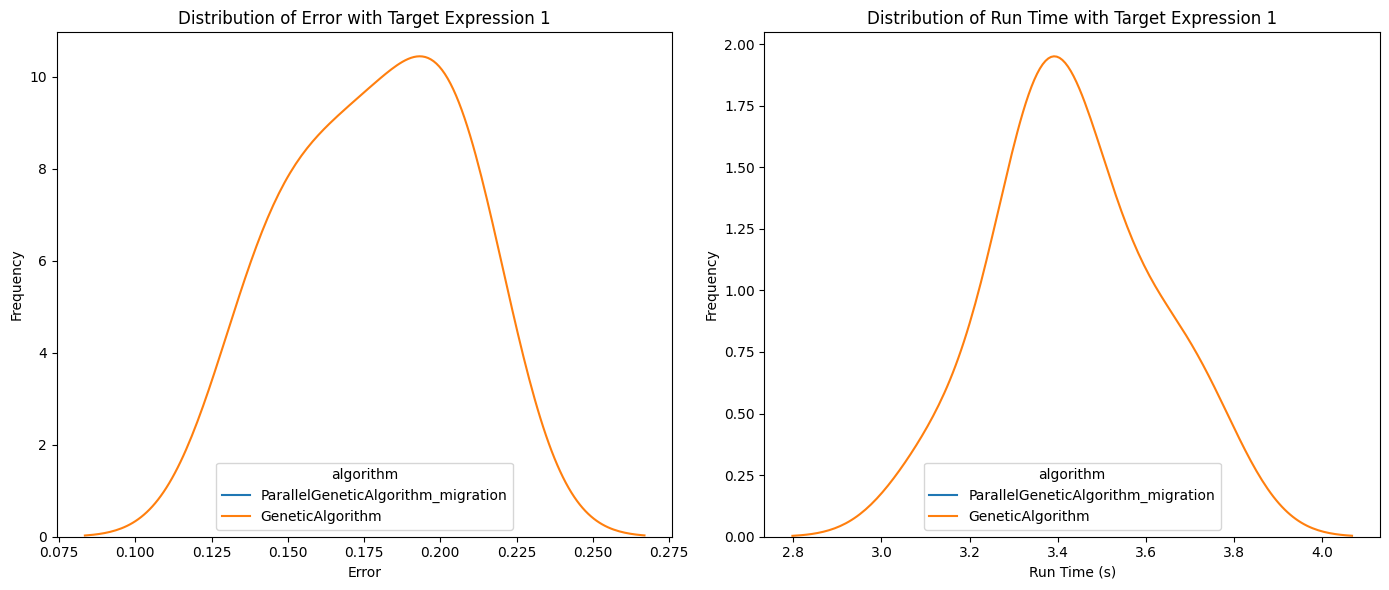

In [8]:
# Read results (if necessary) and plot
results_df = pd.read_csv(f'{shared_data_dir}parallel_comparison.csv')

for target_expression in target_expressions:
    filtered_df = results_df[results_df['target_expression'] == target_expression]
    distribution_plot(filtered_df, target_expression, 'algorithm')